In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

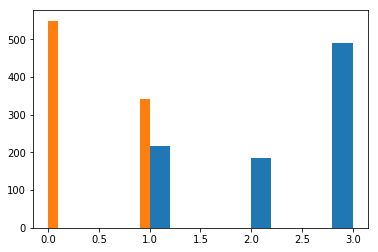

In [2]:
plt.hist(train['Pclass'])
plt.hist(train['Survived'])

In [3]:
train[['Pclass', 'Survived']]
train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
knn = KNeighborsClassifier()
train = train.dropna()
X = train.drop(['Survived', 'Name', 'Embarked', 'Cabin'], axis=1)
y = train['Survived']
le = preprocessing.LabelEncoder()

X['Sex'] = le.fit_transform(train['Sex'])
X['Ticket'] = le.fit_transform(train['Ticket'])

y


1      1
3      1
6      0
10     1
11     1
21     1
23     1
27     0
52     1
54     0
62     0
66     1
75     0
88     1
92     0
96     0
97     1
102    0
110    0
118    0
123    1
124    0
136    1
137    0
139    0
148    0
151    1
170    0
174    0
177    0
      ..
737    1
741    0
742    1
745    0
748    0
751    1
759    1
763    1
765    1
772    0
779    1
781    1
782    0
789    0
796    1
802    1
806    0
809    1
820    1
823    1
835    1
853    1
857    1
862    1
867    0
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [13]:
knn.fit(X, y)
X_test = test.dropna().drop(['Name', 'Embarked', 'Cabin'], axis=1)
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test['Ticket'] = le.fit_transform(X_test['Ticket'])
y_pred = knn.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])